In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns


C:\Users\Shriyans\AppData\Local\Temp\ipykernel_43036\330810680.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Basic NBA EDA that explores various trends that have changed over time

In [2]:
#Loading the dataset
dataset = pd.read_csv('all_seasons.csv', index_col = 'Unnamed: 0')


In [3]:
#Checking the data types of each column
dataset.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [22]:
#Checking for null values
dataset.isna().any()
#As we can see there are no missing values

player_name          False
team_abbreviation    False
age                  False
player_height        False
player_weight        False
college              False
country              False
draft_year           False
draft_round          False
draft_number         False
gp                   False
pts                  False
reb                  False
ast                  False
net_rating           False
oreb_pct             False
dreb_pct             False
usg_pct              False
ts_pct               False
ast_pct              False
season               False
dtype: bool

## 1. Percentage of players from the US vs Percentage of players outside the US

In [4]:
#Percentage of players that are from the US vs Percentage of players not from US

USA = dataset[dataset['country'] == 'USA']

foreign = dataset[dataset['country'] != 'USA']


num_of_foreign = foreign['country'].value_counts().sum()
num_of_USA = USA['country'].value_counts().sum()



df = pd.DataFrame({'USA' : [num_of_USA], 'Foreign' : [num_of_foreign]})

x = df.transpose()

data = x.rename(columns = {0 : 'Num of Players'})


[Text(0, 0, '10721'), Text(0, 0, '2123')]

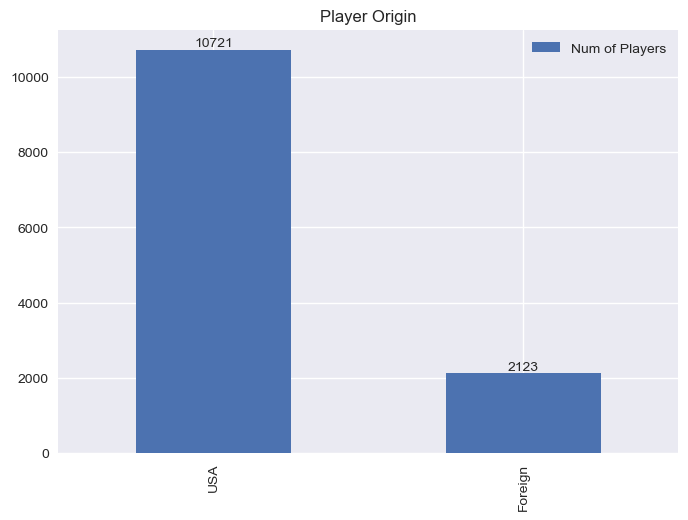

In [5]:
plot = data.plot(kind = 'bar',
          title = 'Player Origin',
          style = 'ggplot'
         )

plot.bar_label(plot.containers[0], label_type='edge')


As we can see, the majority of NBA players originated from the US. This makes sense as America's National Collegiate Athletics Association is a fundamental pathway to the NBA
 

## 2.Player Height over the years

<Axes: title={'center': 'Height Trends'}, xlabel='season', ylabel='player_height'>

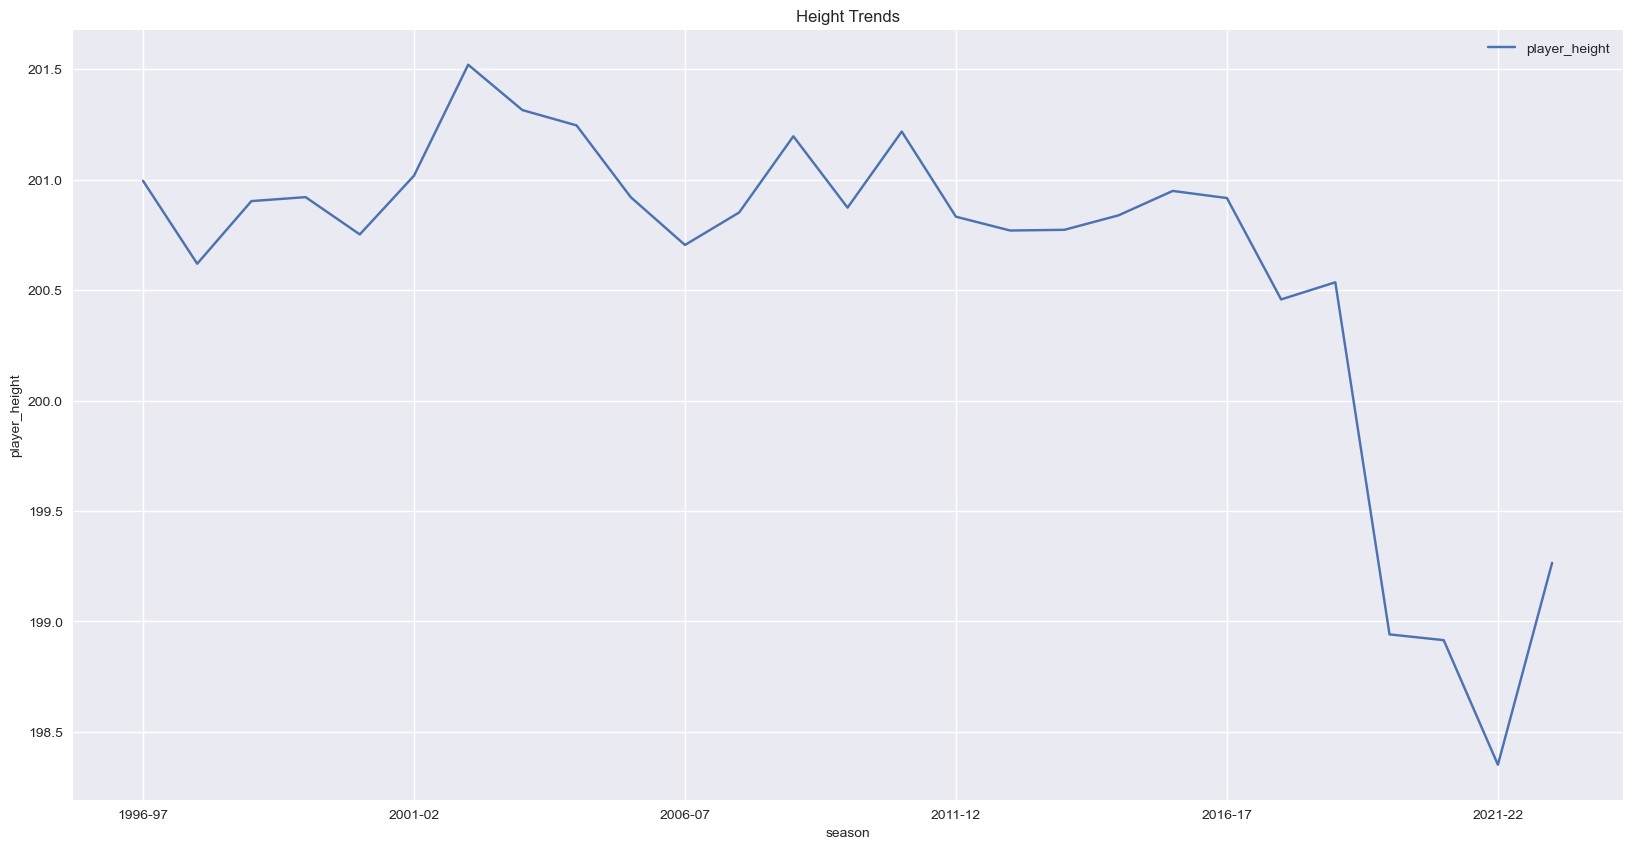

In [6]:
#player_height_column = dataset[['player_height','country']]
#player_height_column.groupby('country').mean()

player_heights = dataset[['player_height', 'season']]
average_height = player_heights.groupby('season').mean()

average_height.plot(kind = 'line',
                   title = 'Height Trends',
                   ylabel = 'player_height',
                   xlabel = 'season',
                   legend = True,
                    grid=True,
                    figsize=(20,10))

As we can see the average NBA player height has steadily declined. 
This may be the result of the emergence of small ball line ups predominantly consisting of guards, due to the 
emergence of the three point line and it's importance


## 3. Player age over the years

<Axes: title={'center': 'Age Trends'}, xlabel='season', ylabel='age'>

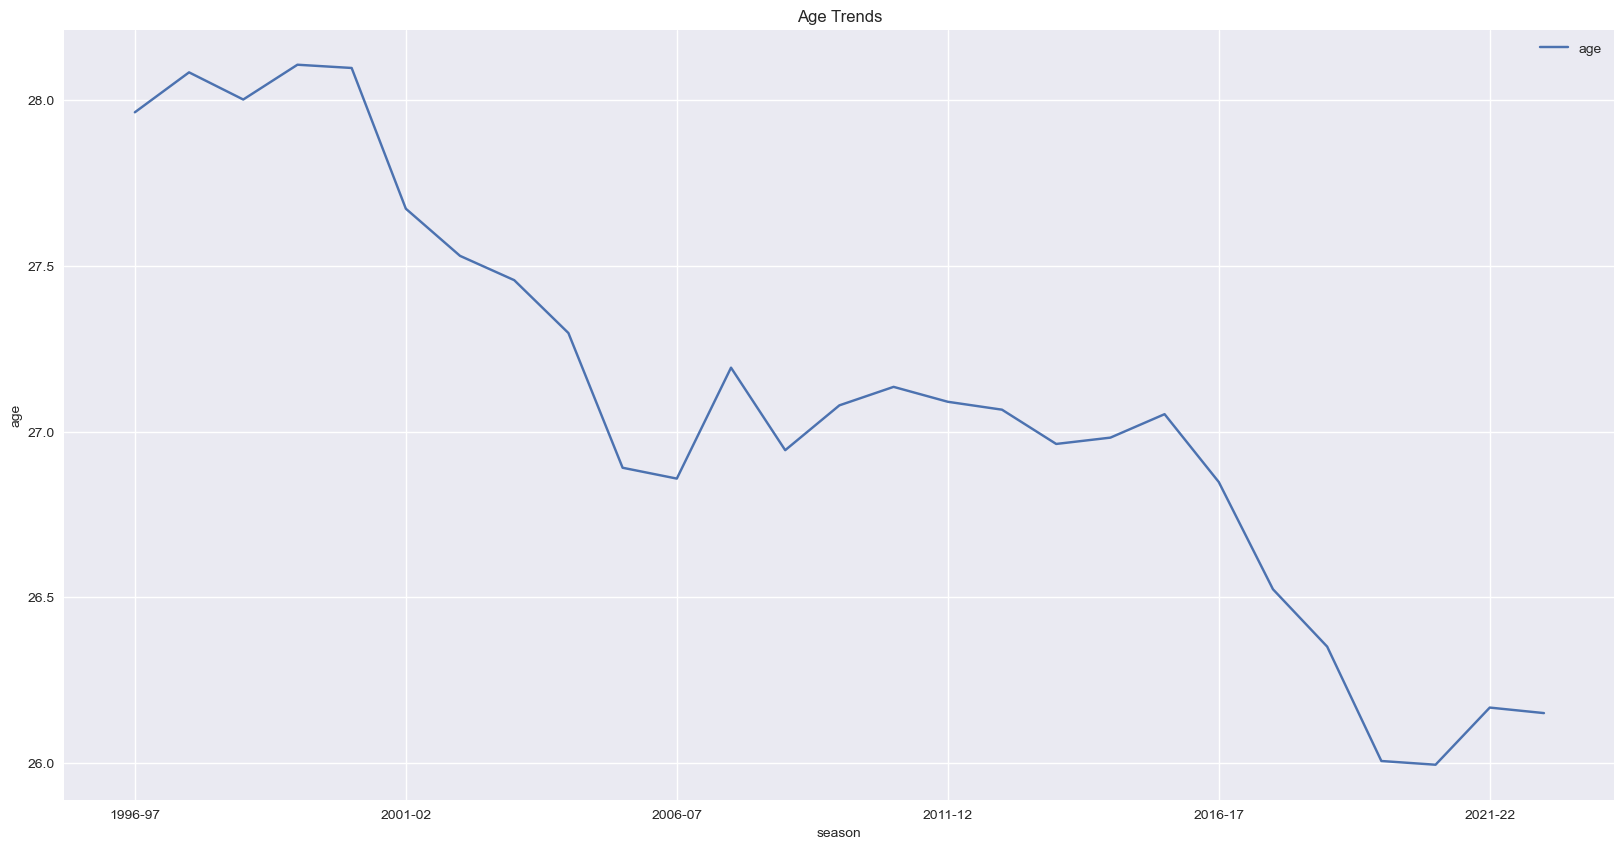

In [7]:
#Player age changes 

#convert data to date time 
#dataset['season'] = pd.to_datetime(dataset['season'].str[:4]) - how to convert to date time


player_ages = dataset[['age', 'season']]
average_ages = player_ages.groupby('season').mean()

average_ages.plot(kind = 'line',
                   title = 'Age Trends',
                   ylabel = 'age',
                   xlabel = 'season',
                   legend = True,
                    grid=True,
                    figsize=(20,10))



The average age of a NBA player has decreased. 

## 4. Dallas Mavericks Key Stats




In [8]:
#df['season'] = pd.to_datetime(df['season'].str[:4])

#Creating a data frame that only has Dallas Mav data

dallas_mavs = dataset[dataset['team_abbreviation'] == 'DAL']


dallas_mav_data = dallas_mavs.set_index('player_name')

#all_seasons.loc[all_seasons.player_name == 'LeBron James', ['player_name', 'pts', 'season']]


In [9]:
dallas_mav_data

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
player_name,,,,,,,,,,,,,,,,,,,,
Greg Dreiling,DAL,33.0,215.90,120.201880,Kansas,USA,1986,2,26,40,2.0,1.9,0.3,-8.0,0.059,0.192,0.114,0.466,0.048,1996-97
Fred Roberts,DAL,36.0,208.28,98.883056,Brigham Young,USA,1982,2,27,12,1.8,0.8,0.0,-13.1,0.053,0.178,0.265,0.520,0.000,1996-97
Erick Strickland,DAL,23.0,190.50,95.254320,Nebraska,USA,Undrafted,Undrafted,Undrafted,28,10.6,3.2,2.4,-6.4,0.032,0.112,0.216,0.510,0.161,1996-97
Jamie Watson,DAL,25.0,200.66,86.182480,South Carolina,USA,1994,2,47,23,3.4,2.0,1.4,-7.8,0.069,0.098,0.149,0.493,0.159,1996-97
Jason Sasser,DAL,23.0,200.66,102.058200,Texas Tech,USA,1996,2,41,8,2.4,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
McKinley Wright IV,DAL,24.0,180.34,87.089664,Colorado,USA,Undrafted,Undrafted,Undrafted,27,4.2,1.7,2.1,-14.9,0.026,0.109,0.160,0.536,0.275,2022-23
Luka Doncic,DAL,24.0,200.66,104.326160,None,Slovenia,2018,1,3,66,32.4,8.6,8.0,2.1,0.024,0.224,0.368,0.609,0.408,2022-23
JaVale McGee,DAL,35.0,213.36,122.469840,Nevada,USA,2008,1,18,42,4.4,2.5,0.3,-7.3,0.086,0.199,0.214,0.650,0.051,2022-23


### 4.1.1. Scoring Leaders

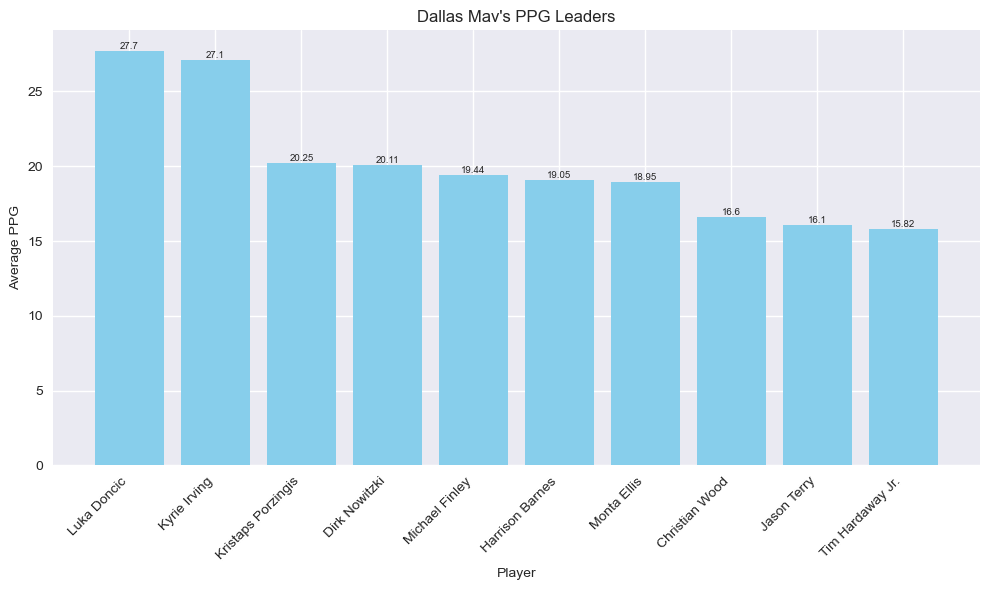

In [10]:
#Scoring Leaders
#Top 10 Highest PPG 

#Find the average points of each player

average_points = dallas_mav_data.groupby('player_name')['pts'].mean()


#Sort the series by descending
highest_ppg = average_points.sort_values(ascending = False)

#Index by 10
top_10_ppg = highest_ppg[:10].round(2)


#Plot the data
plt.figure(figsize = (10,6))
bars = plt.bar(top_10_ppg.index, top_10_ppg.values, color = 'skyblue')

#Adding labels 
for x in range(len(bars)):
    bar = bars[x]
    ppg = top_10_ppg.values[x]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(ppg),
            ha = 'center', va = 'bottom', fontsize = 7)

plt.title("Dallas Mav's PPG Leaders")
plt.xlabel("Player")
plt.ylabel("Average PPG")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.1.2. Assist Leaders

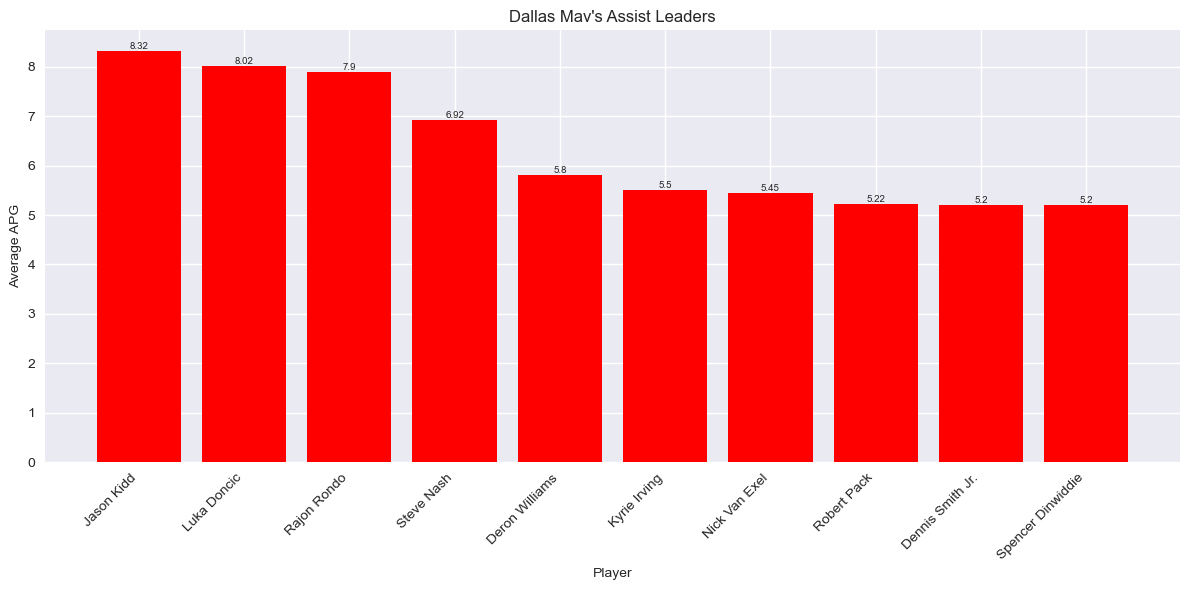

In [11]:
#Assist leaders
average_assists =  dallas_mav_data.groupby('player_name')['ast'].mean()

#Sort the series 
highest_ast = average_assists.sort_values(ascending = False)

#Grab top 10
top_10_ast = highest_ast[:10].round(2)


plt.figure(figsize = (12,6))
bars = plt.bar(top_10_ast.index, top_10_ast.values, color = 'red')

#Adding labels 
for i in range(len(bars)):
    bar = bars[i]
    apg = top_10_ast.values[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(apg),
            ha = 'center', va = 'bottom', fontsize = 7)


plt.title("Dallas Mav's Assist Leaders")
plt.xlabel("Player")
plt.ylabel("Average APG")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Bust or Not 

In this section we look at the first round pick of each draft year and compare stats to see who panned out as a generational talent and who unfortunately get labeled as busts

In [23]:
#https://www.kaggle.com/code/garrethlee/nba-player-exploratory-data-analysis#Draft-Picks-%F0%9F%A5%87
#Get rid of undrafted players
updated_df = dataset[(dataset['draft_round'] != 'Undrafted') & (dataset['draft_number'] != 'Undrafted')]



#Converting objects to ints 

#updated = updated_df['draft_number'].astype(str).astype(int)
#updated = updated_df['draft_round'].astype(str).astype(int)


#Filtering out number 1 draft picks

number_1 = updated_df [(updated_df ['draft_round']  == '1') & (updated_df ['draft_number'] == '1')]

#Create an empty datafrane
stat_comparison = pd.DataFrame(columns = ['Player Name', 'Average PPG', 'Average APG', 'Average RBG'])

#Iterate through the dataframe to find average stat totals

for player_name , row in number_1.groupby('player_name'):
    
    
    total_points = row['pts'].sum()
    total_assists = row['ast'].sum()
    total_rebounds = row['reb'].sum()
    total_games_played = row['gp'].sum()
    total_occurences = len(row)
    
    if total_games_played != 0:
        avg_ppg = total_points / total_occurences
        avg_apg = total_assists / total_occurences
        avg_rpg = total_rebounds / total_occurences
    else:
        avg_ppg = 0
        avg_apg = 0
        avg_rpg = 0
        
    stat_comparison = stat_comparison.append({'Player Name' : player_name, 
                                              'Average PPG' : avg_ppg,
                                              'Average APG' : avg_apg,
                                              'Average RBG' : avg_rpg},
                                             ignore_index = True)
    

    


C:\Users\Shriyans\AppData\Local\Temp\ipykernel_43036\1812291941.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_comparison = stat_comparison.append({'Player Name' : player_name,
C:\Users\Shriyans\AppData\Local\Temp\ipykernel_43036\1812291941.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_comparison = stat_comparison.append({'Player Name' : player_name,
C:\Users\Shriyans\AppData\Local\Temp\ipykernel_43036\1812291941.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_comparison = stat_comparison.append({'Player Name' : player_name,
C:\Users\Shriyans\AppData\Local\Temp\ipykernel_43036\1812291941.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [24]:
stat_comparison

,Player Name,Average PPG,Average APG,Average RBG
0,Allen Iverson,26.064286,6.000000,3.692857
1,Andrea Bargnani,14.270000,1.230000,4.530000
2,Andrew Bogut,8.600000,2.035714,8.192857
3,Andrew Wiggins,19.077778,2.388889,4.544444
4,Anthony Bennett,3.975000,0.400000,2.850000
5,Anthony Davis,23.818182,2.454545,10.290909
6,Anthony Edwards,21.733333,3.700000,5.100000
7,Ben Simmons,14.060000,7.380000,7.640000
8,Blake Griffin,17.930769,3.892308,7.484615
9,Cade Cunningham,18.650000,5.800000,5.850000


## 6. First Round Picks

In [13]:
draft_picks = dataset[dataset['draft_year'] == dataset['season'].str[:4]]

In [14]:
first_round_picks = draft_picks[draft_picks.draft_number.isin(['1'])]

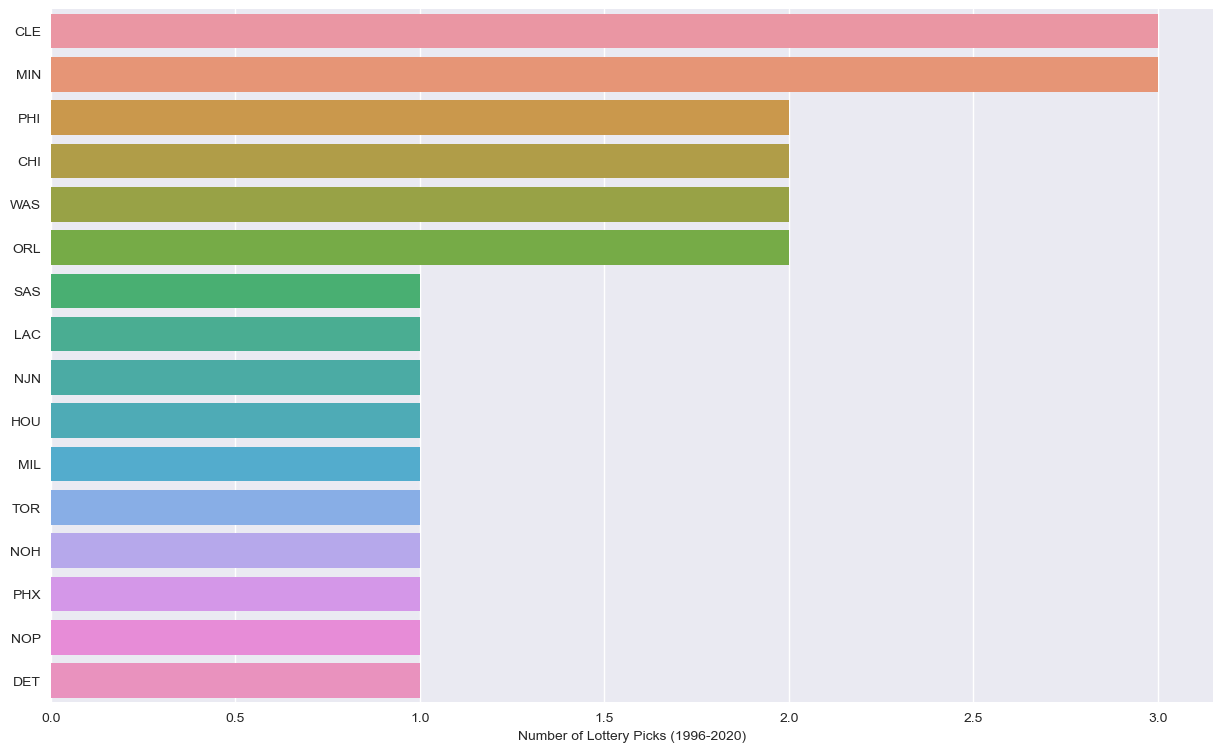

In [15]:
team_1st_round_picks = first_round_picks['team_abbreviation'].value_counts()


plt.figure(figsize=(15,9))

sns.barplot(x= team_1st_round_picks, y = team_1st_round_picks.index)

plt.xlabel('Number of Lottery Picks (1996-2020)')
plt.show()

As we can see both the Timberwolves and Cleaveland had the most number of 1st round draft picks between 1996 and 2020. 

## 7. College Breakdown

Lets see which college produces the most lottery picks

In [16]:
#A loterry pick in this case will be first round draft players picked between 1-4

#Using the dataset created above, we filter out the lottery picks 
lottery_picks = draft_picks[draft_picks.draft_number.isin(['1','2', '3', '4'])]


college_stats = lottery_picks['college'].value_counts()

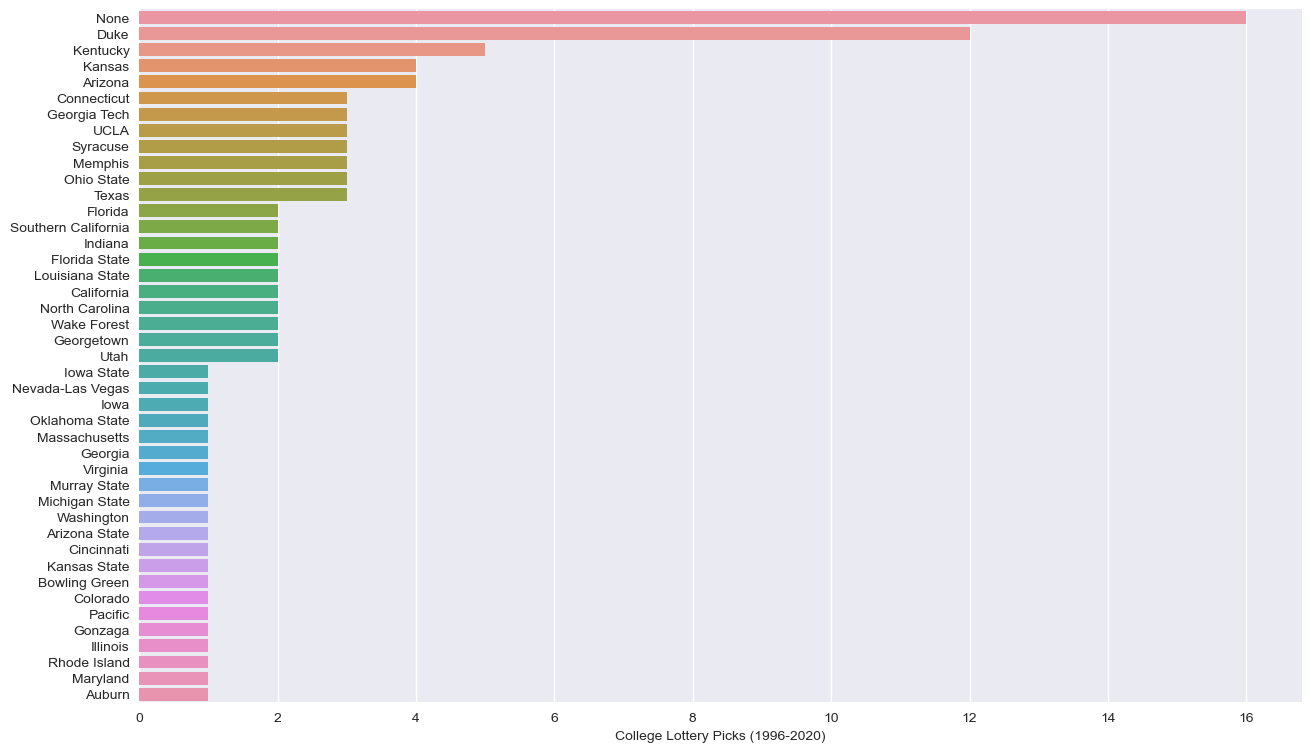

In [17]:
plt.figure(figsize=(15,9))

sns.barplot(x= college_stats, y = college_stats.index)

plt.xlabel('College Lottery Picks (1996-2020)')
plt.show()

Surprisingly, the most number of lottery picks did not attend college. The most successful college program is Duke followed by Kentucky. 